In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysolver as solver

# Forced Oscillation

In [2]:
def oscillator(y,t, lam, wf, F0, K, M):
        '''
        This is the function (osci) defined in the [position, velocity] 
        and [derivative(position), derivative(velocity)]
        :param y: [position, velocity]
        :param t: time (time varying)
        :param lam: \lambda ==> damping constant
        :param wf: \omega_f ==> forceing frequency
        :param F0: initial forceing force
        :param K: spring constants
        :param M: mass constant
        '''
        yder =  np.zeros(2)
        yder[0] = y[1]
        yder[1] = -y[0] * K/M - y[1] * lam / M + F0 * np.cos(wf * t)# the difinition of the acceleration, which is depend on the position.
        
        return yder

In [3]:
N, t = int(1e3), 50 # divided into 100
dt = t/N

M, K = 1, 1
A = 1 # initial amplitude
lam = 0.2
phi = - np.pi/2
r = lam/(2 * M)
F0 = 0.5
wf = 0.8
w0 = np.sqrt(K/M)
w = np.sqrt(abs(np.square(w0) - np.square(r)))

y0  = np.zeros(2)
y0[0]= 0 # initial position
y0[1] = -A * r * np.cos(phi) - A * w * np.sin(phi)

x = np.linspace(0, t, N) # from 0 to t divided by N+1, i.e., N+1 equal parts.

In [4]:
sol1 = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, wf, F0, K, M))[0]
sol2 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, wf, F0, K, M))[0]
sol3 = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, wf, F0, K, M))[0]

sol1_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, wf, F0, K, M))[1]
sol2_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, wf, F0, K, M))[1]
sol3_v = solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, wf, F0, K, M))[1]

K1 = 0.5 * M * np.square(sol1)
K2 = 0.5 * M * np.square(sol2)
K3 = 0.5 * M * np.square(sol3)

U1 = 0.5 * K * np.square(sol1_v)
U2 = 0.5 * K * np.square(sol2_v)
U3 = 0.5 * K * np.square(sol3_v)

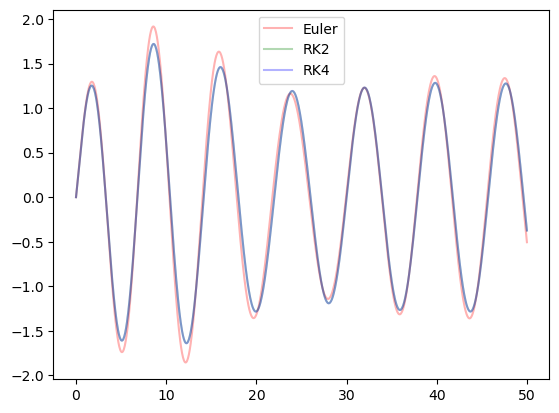

In [5]:
# position

plt.plot(x, sol1, "r", label = "Euler", alpha = 0.3)
plt.plot(x, sol2, "g", label = "RK2", alpha = 0.3)
plt.plot(x, sol3, "b", label = "RK4", alpha = 0.3)
plt.legend()


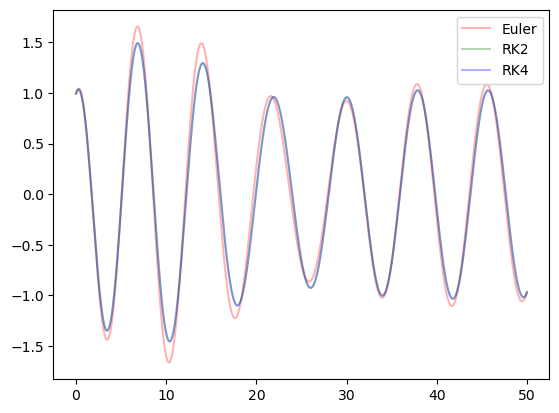

In [6]:
# velocity

plt.plot(x, sol1_v, "r", label = "Euler", alpha = 0.3)
plt.plot(x, sol2_v, "g", label = "RK2", alpha = 0.3)
plt.plot(x, sol3_v, "b", label = "RK4", alpha = 0.3)
plt.legend()


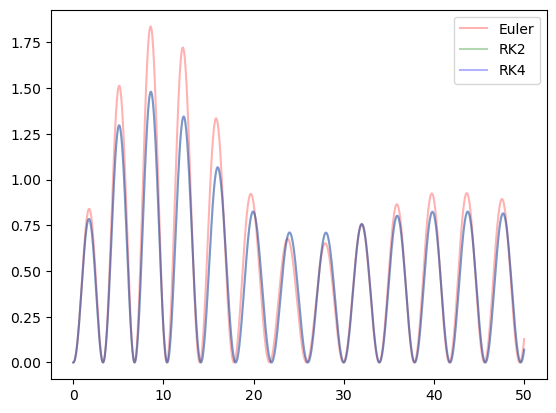

In [7]:
# Kentical energy

plt.plot(x, K1, "r", label = "Euler", alpha = 0.3)
plt.plot(x, K2, "g", label = "RK2", alpha = 0.3)
plt.plot(x, K3, "b", label = "RK4", alpha = 0.3)
plt.legend()

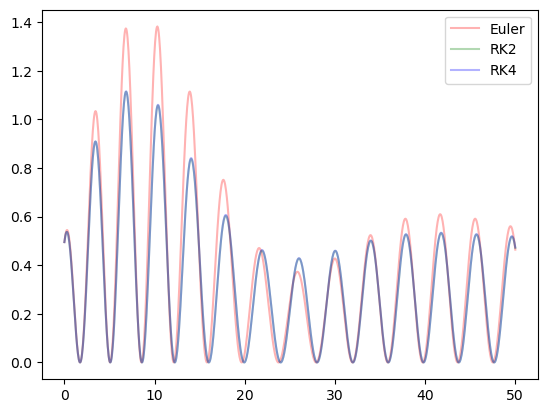

In [8]:
# Potential energy

plt.plot(x, U1, "r", label = "Euler", alpha = 0.3)
plt.plot(x, U2, "g", label = "RK2", alpha = 0.3)
plt.plot(x, U3, "b", label = "RK4", alpha = 0.3)
plt.legend()

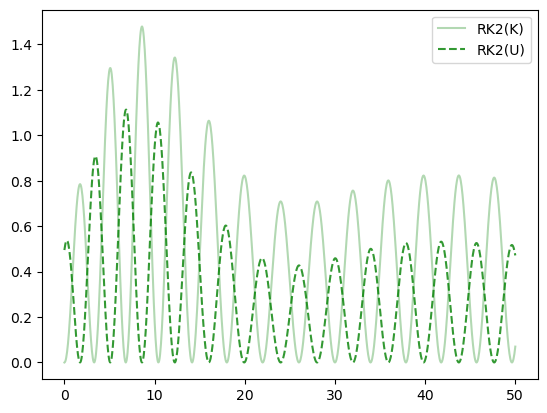

In [9]:
# Energy

# plt.plot(x, K1, "r", label = "Euler(K)", alpha = 0.3)
plt.plot(x, K2, "g", label = "RK2(K)", alpha = 0.3)
# plt.plot(x, K3, "b", label = "RK4(K)", alpha = 0.3)

# plt.plot(x, U1, "r--", label = "Euler(U)", alpha = 0.8)
plt.plot(x, U2, "g--", label = "RK2(U)", alpha = 0.8)
# plt.plot(x, U3, "b--", label = "RK4(U)", alpha = 0.8)
plt.legend()

# Performance

Use the `%timeit` function to compare the performance of different numerical methods

In [10]:
%timeit solver.solve_ivp(oscillator, y0, t, dt, N, method="Euler", args=(lam, wf, F0, K, M))[0]
%timeit solver.solve_ivp(oscillator, y0, t, dt, N, method="RK2", args=(lam, wf, F0, K, M))[0]
%timeit solver.solve_ivp(oscillator, y0, t, dt, N, method="RK4", args=(lam, wf, F0, K, M))[0]

7.01 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.61 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.3 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Use Scipy (`scipy.integreate.solve_ivp`)

see https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [11]:
import scipy.integrate as ode

In [12]:
# TODO: use scipy to solve the same ODE

In [13]:
# TODO: compare the results. Are your own results same as the scipy's result?

In [14]:
# TODO: compare the performnace. Can you explain your performance results? 